# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


As we can see here the features are:
- Age: Age of primary beneficiary
- Sex: Male or Female
- bmi: Body mass index (ideally 18.5 to 24.9)
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking (yes or no)
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

The Target variable is charges (Individual medical costs billed by health insurance)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Data Visualization

In [8]:
continous_features = ['age', 'bmi', 'charges']
categorical_features = ['children', 'sex', 'smoker', 'region']

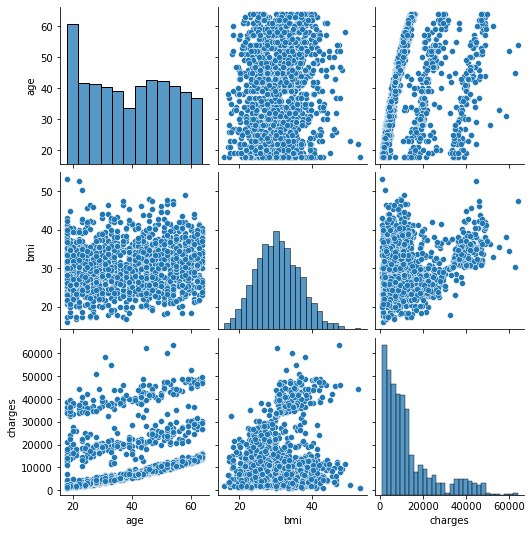

In [9]:
sns.pairplot(df, vars=continous_features)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

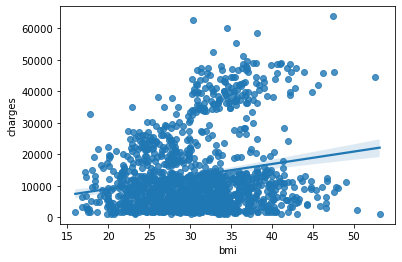

In [10]:
sns.regplot(x='bmi', y='charges', data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

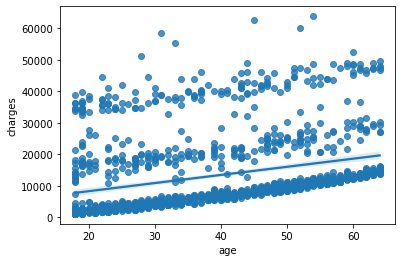

In [11]:
sns.regplot(x='age', y='charges', data=df)

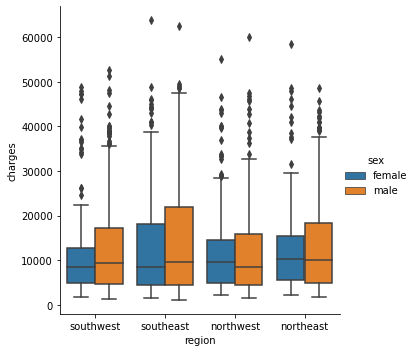

In [12]:
sns.catplot(x="region", y="charges", hue="sex", kind="box",data=df)

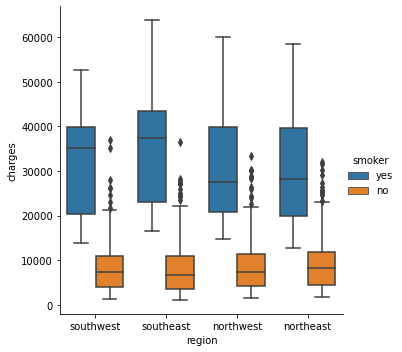

In [13]:
sns.catplot(x="region", y="charges", hue="smoker", kind="box",data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

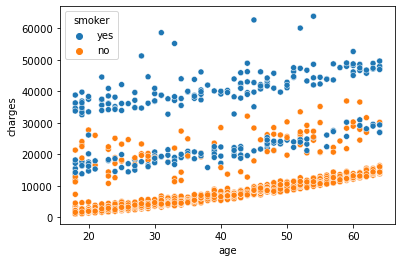

In [14]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

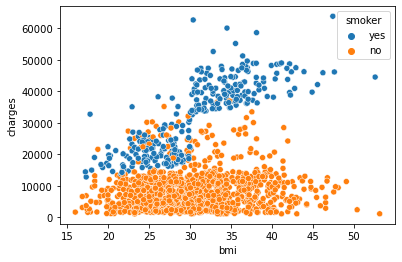

In [15]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

<AxesSubplot:>

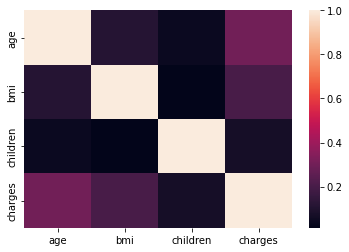

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)

## Data Pre-processing

In [8]:
gender_dummies = pd.get_dummies(df['sex'])
df = pd.concat([df, gender_dummies], axis=1)

In [9]:
df.drop('sex', axis=1, inplace=True)

In [10]:
smoker_dummies = pd.get_dummies(df['smoker'])
df = pd.concat([df, smoker_dummies], axis=1)
df.drop('smoker', axis=1, inplace=True)

In [11]:
df.rename({'no':'non-smoker', 'yes':'smoker'}, axis=1, inplace=True)

In [12]:
df

,age,bmi,children,region,charges,female,male,non-smoker,smoker
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,1,0
1334,18,31.920,0,northeast,2205.98080,1,0,1,0
1335,18,36.850,0,southeast,1629.83350,1,0,1,0
1336,21,25.800,0,southwest,2007.94500,1,0,1,0


In [1]:
import category_encoders as ce

In [14]:
encoder_region = ce.BinaryEncoder(df, cols=['region'],return_df=True)
regions_encoded = encoder_region.fit_transform(df['region']) 
regions_encoded

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,region_0,region_1,region_2
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,1
4,0,1,1
...,...,...,...
1333,0,1,1
1334,1,0,0
1335,0,1,0
1336,0,0,1


In [15]:
df = pd.concat([df, regions_encoded], axis=1)
df.drop('region', axis=1, inplace=True)

In [16]:
df

,age,bmi,children,charges,female,male,non-smoker,smoker,region_0,region_1,region_2
0,19,27.900,0,16884.92400,1,0,0,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,1
4,32,28.880,0,3866.85520,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,1
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,1


In [17]:
df.to_csv('final_insurance.csv', index=False)

## Linear Regression - Model Training

In [26]:
X = df.drop('charges', axis=1)
y = df['charges']

In [27]:
X

,age,bmi,children,female,male,non-smoker,smoker,region_0,region_1,region_2
0,19,27.900,0,1,0,0,1,0,0,1
1,18,33.770,1,0,1,1,0,0,1,0
2,28,33.000,3,0,1,1,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,1
4,32,28.880,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,1
1334,18,31.920,0,1,0,1,0,1,0,0
1335,18,36.850,0,1,0,1,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
clf.coef_

array([   261.56839546,    347.09728999,    371.76216879,    -60.56184313,
           60.56184313, -11850.49164341,  11850.49164341,   1350.76597307,
          464.26639193,    546.88118528])

## Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4193.463021932157
Root Mean Squared Error: 5923.700340633857


In [36]:
charges_mean = y_test.mean()
print("Mean of charges:", charges_mean)

Mean of charges: 13048.923798052047


In [37]:
print("Percentage of error compared to mean:", np.sqrt(mean_squared_error(y_test, y_pred))/charges_mean * 100)

Percentage of error compared to mean: 45.3960834802189


In [38]:
print("R2 score:",r2_score(y_test, y_pred))

R2 score: 0.7605492639270064


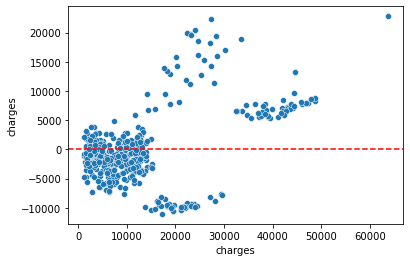

In [39]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

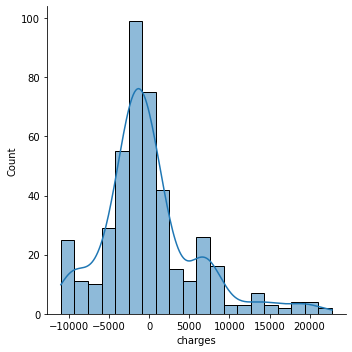

In [40]:
sns.displot(test_residuals, bins=20, kde=True)

Text(0, 0.5, 'charges')

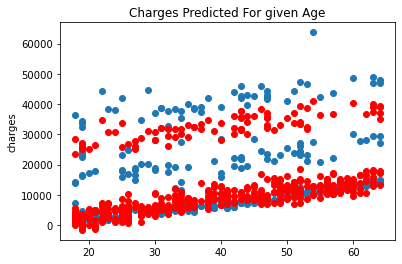

In [41]:
ax = plt.axes()
ax.plot(X_test['age'], y_test, 'o')
ax.plot(X_test['age'], y_pred, 'o', color='red')
ax.set_title('Charges Predicted For given Age')
ax.set_ylabel("charges")

Text(0, 0.5, 'charges')

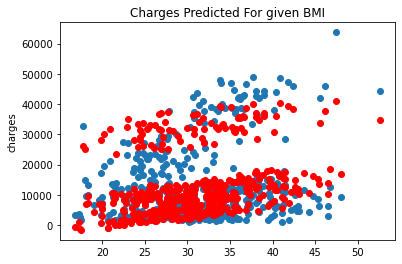

In [42]:
ax = plt.axes()
ax.plot(X_test['bmi'], y_test, 'o')
ax.plot(X_test['bmi'], y_pred, 'o', color='red')
ax.set_title('Charges Predicted For given BMI')
ax.set_ylabel("charges")

As we can see from the residual plot that the data is not fully linearly related but still few paraments can be predicted using a linear relationship hence the root mean squared error is quite high due to high penalty for somepoints but the r2 score and net error percentage are still better as few have linear relation (like age, bmi to a certain extent) and we can see that the predicted values are quite close to the true output as seen the last two graphs where the blue denotes the true value and red denotes the predicted values.